In [1]:
import pandas as pd     #18/04/2025  flask is used to make web pages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [8]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


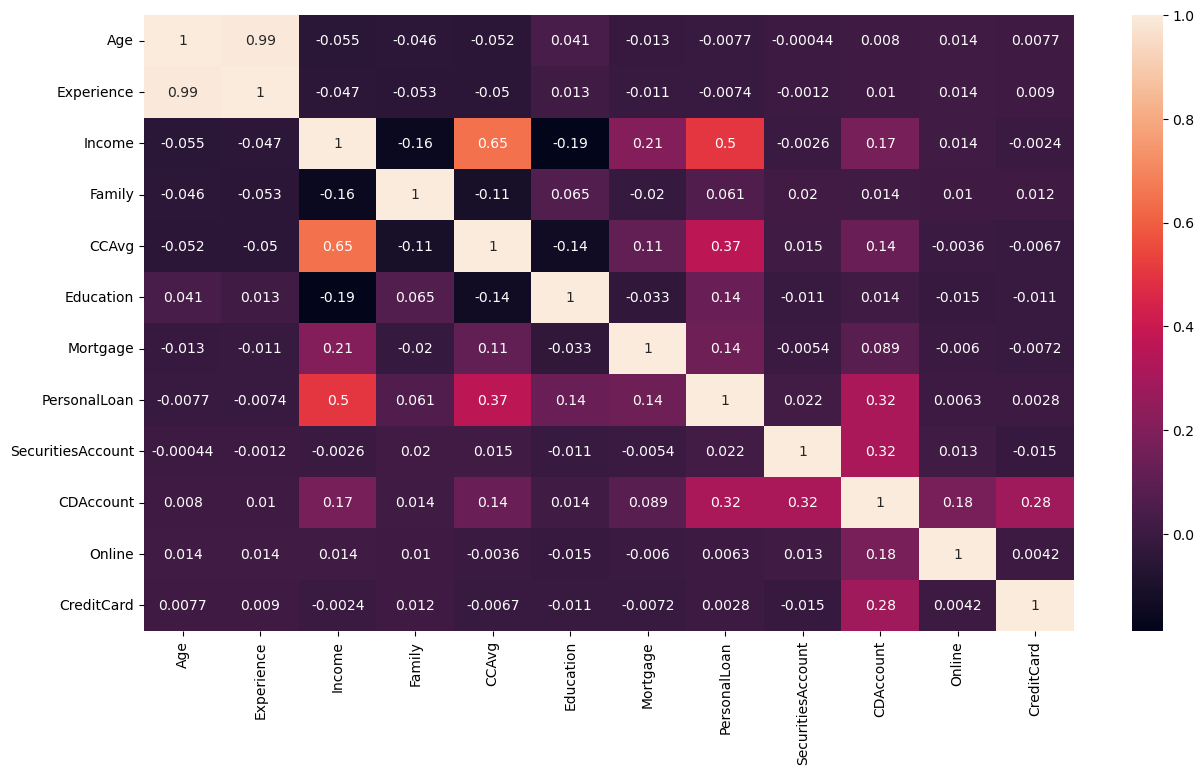

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
zero_class=df[df["CreditCard"]==0]
one_class=df[df["CreditCard"]==1]
print(zero_class.shape,one_class.shape)

(3530, 12) (1470, 12)


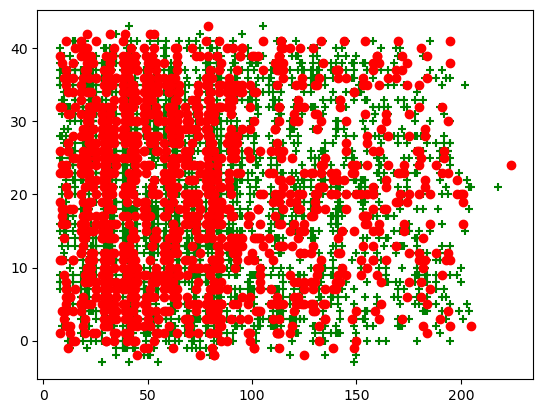

In [11]:
#income vs expericence scatter plot
plt.scatter(zero_class["Income"],
           zero_class["Experience"],
           color="green",marker="+")
plt.scatter(one_class["Income"],
           one_class["Experience"],
           color="red",marker="o")
plt.show()

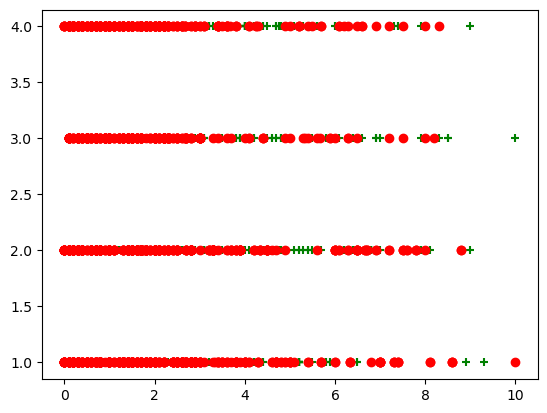

In [12]:
##ccavg vs family scatter plot

plt.scatter(zero_class["CCAvg"],
           zero_class["Family"],
           color="green",marker="+")
plt.scatter(one_class["CCAvg"],
           one_class["Family"],
           color="red",marker="o")
plt.show()

In [13]:
##data scale --aapko aapke data ko ek 
#range me lake aana hota hai
#standard scalar --sd- 1,mean-> 0
#minmax scaler

In [14]:
## StandardScaler

from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaled = scaler.fit(df.drop("CreditCard",axis=1)).transform(
    df.drop("CreditCard",axis=1)
)


# scaled = scaler.fit_transform(df.drop("CreditCard",axis=1)

df_scaled =pd.DataFrame(scaled,columns=df.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [15]:
## x y split
x=df_scaled
y=df[["CreditCard"]]

In [16]:
##svm implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=0)

In [18]:
svm=SVC()
svm.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [19]:
svm.score(x_test,y_test)

0.749

In [20]:
svm.score(x_train,y_train)

0.74575

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
pred=svm.predict(x_test)
y_test["prediction"]=pred
y_test

,CreditCard,prediction
398,0,0
3833,0,0
4836,1,0
4572,0,0
636,0,0
...,...,...
4228,0,0
2367,1,0
788,0,0
1452,0,0


In [29]:

print(confusion_matrix(y_test["CreditCard"],y_test["prediction"]))

[[700   4]
 [247  49]]


<Axes: >

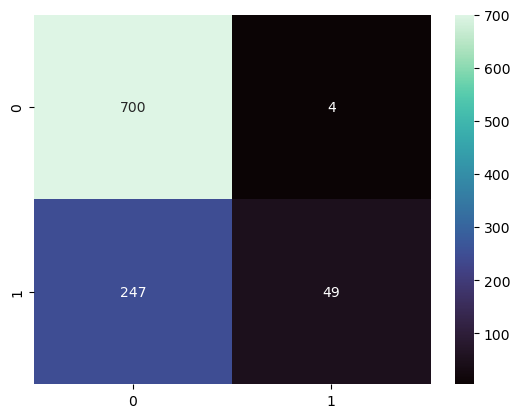

In [32]:
sns.heatmap(confusion_matrix(y_test["CreditCard"],y_test["prediction"]),annot=True,fmt="d",cmap="mako")


In [33]:

print(classification_report(y_test["CreditCard"],y_test["prediction"]))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [36]:
##kernel in svm
#linear ,rbf,poly,sigmoid
#applying diff types of kernel
##1-linear kernel
from sklearn.svm import SVC
linear_svm=SVC(kernel="linear")
linear_svm.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [37]:
from sklearn.svm import SVC
linear_svm=SVC(kernel="sigmoid")
linear_svm.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [40]:
from sklearn.svm import SVC
linear_svm=SVC(kernel="rbf")
linear_svm.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()